In [74]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074738,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471443,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012114,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040895,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157446,283192000


Text(0, 0.5, 'Prices ($)')

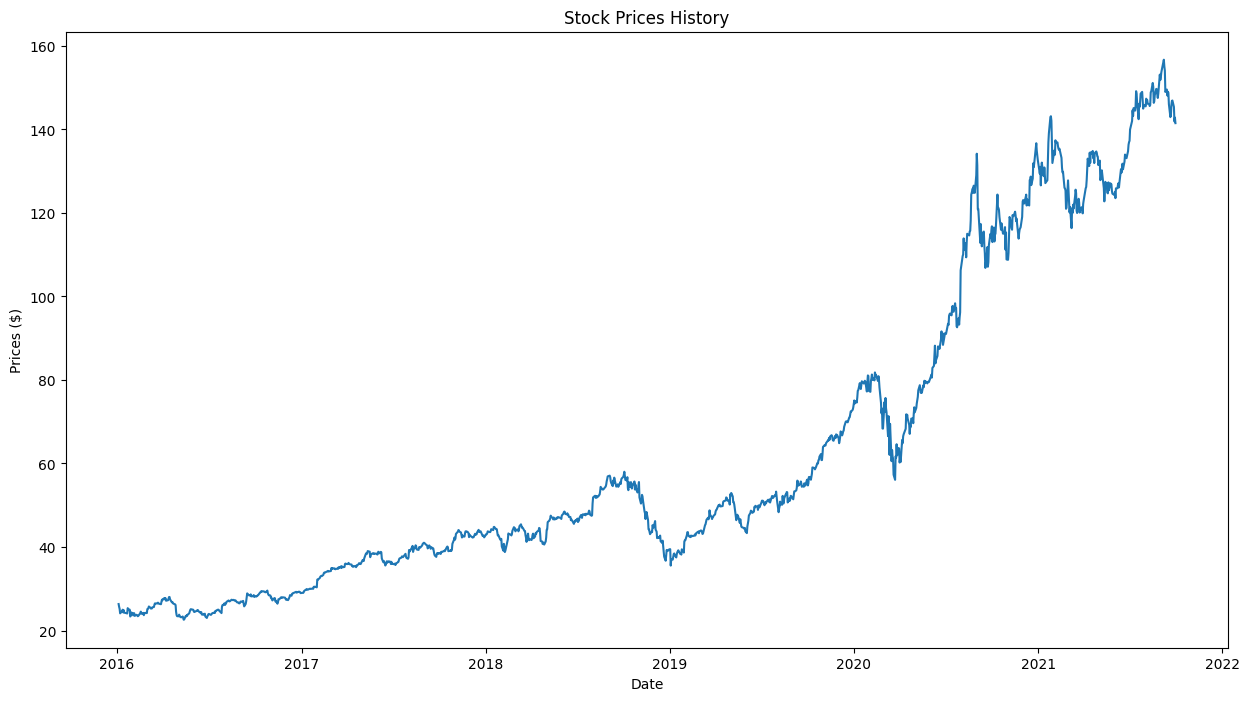

In [75]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [76]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [77]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [78]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
1098/1098 [==============================] - 26s 22ms/step - loss: 6.9734e-04
Epoch 2/3
1098/1098 [==============================] - 29s 26ms/step - loss: 3.6159e-04
Epoch 3/3
1098/1098 [==============================] - 28s 25ms/step - loss: 3.2710e-04


In [80]:
# x_test = np.zeros_like(x_test)

In [81]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10/10 [==============================] - 1s 23ms/step


1.4711345685807067

C:\Users\e4903\AppData\Local\Temp\ipykernel_16880\154904543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


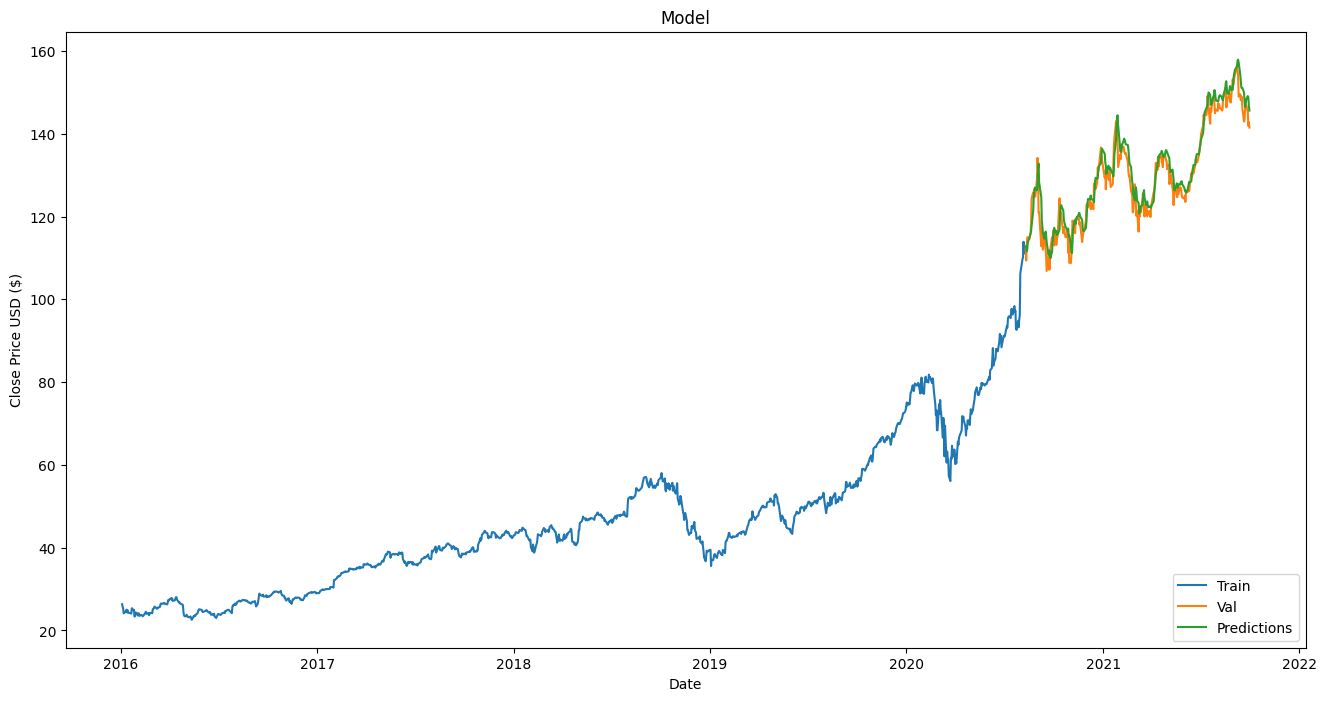

In [82]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [83]:
stock_data_2 = yf.download('AAPL', start='2021-10-01', end='2021-12-31')
stock_data_2.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,141.899994,142.919998,139.110001,142.649994,141.404266,94639600
2021-10-04,141.759995,142.210007,138.270004,139.139999,137.924911,98322000
2021-10-05,139.490005,142.240005,139.360001,141.110001,139.877731,80861100
2021-10-06,139.470001,142.149994,138.369995,142.000000,140.759949,83221100
2021-10-07,143.059998,144.220001,142.720001,143.289993,142.038696,61732700


In [84]:
close_prices = stock_data_2['Close']
values = close_prices.values
training_data_len = math.ceil(len(values))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
# train_data = scaled_data[0: training_data_len, :]

# x_train = []
# y_train = []

# for i in range(60, len(train_data)):
#     x_train.append(train_data[i-60:i, 0])
#     y_train.append(train_data[i, 0])
    
# x_train, y_train = np.array(x_train), np.array(y_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [87]:
test_data = scaled_data[training_data_len-10: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])

x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [88]:
x_test.shape

(0,)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10/10 [==============================] - 0s 5ms/step


40.66191710897795

In [ ]:
len(x_test)

289

In [ ]:
len(predictions)

289

In [ ]:
close_prices

Date
2021-10-01    142.649994
2021-10-04    139.139999
2021-10-05    141.110001
2021-10-06    142.000000
2021-10-07    143.289993
                 ...    
2021-12-23    176.279999
2021-12-27    180.330002
2021-12-28    179.289993
2021-12-29    179.380005
2021-12-30    178.199997
Name: Close, Length: 63, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (63,) and (289, 1)

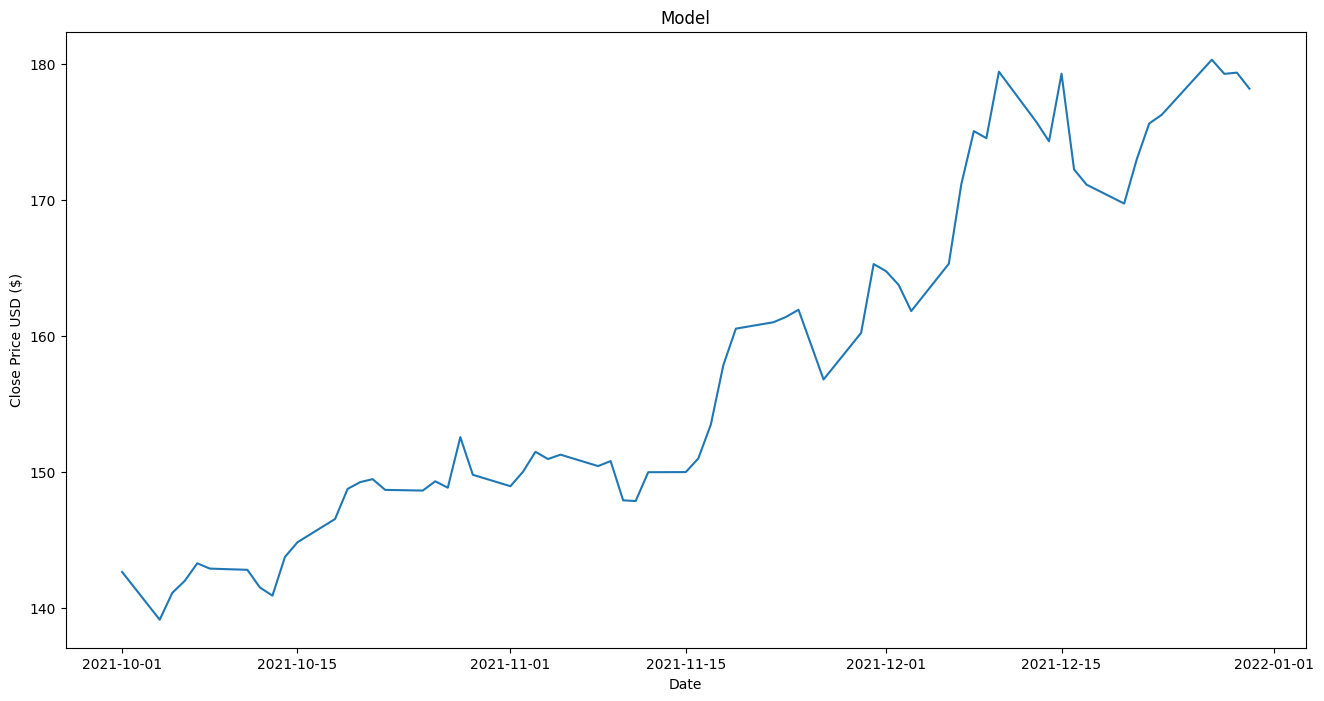

In [ ]:
data = stock_data_2.filter(['Close'])
# test = data[:training_data_len]
# validation = data[training_data_len:]
# validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(close_prices.index, close_prices, label='test')
plt.plot(close_prices.index, predictions, label='predictions')
plt.legend(['test', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf

# Load data
df = yf.download('AAPL', start='2016-01-01', end='2021-10-01')

# Data preprocessing
data = df.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
training_data = scaled_data[:int(len(data)*0.8), :]
testing_data = scaled_data[int(len(data)*0.8):, :]

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(training_data.shape[1], 10)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



[*********************100%***********************]  1 of 1 completed


In [ ]:
len(training_data.reshape((training_data.shape[0], training_data.shape[1], 1)))

1157

In [ ]:
len(training_data[:, 0])

1157

In [ ]:
# Train the model
model.fit(training_data.reshape((training_data.shape[0], training_data.shape[1], 1)), 
          training_data[:, 0], 
          epochs=50, 
          batch_size=1, 
          verbose=2)


Epoch 1/50


ValueError: in user code:

    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_15" "                 f"(type Sequential).
    
    Input 0 of layer "lstm_30" is incompatible with the layer: expected shape=(None, None, 10), found shape=(1, 1, 1)
    
    Call arguments received by layer "sequential_15" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(1, 1, 1), dtype=float32)
      • training=True
      • mask=None


In [ ]:
# Make predictions
predictions = model.predict(testing_data.reshape((testing_data.shape[0], testing_data.shape[1], 10)))
predictions = scaler.inverse_transform(predictions)

# Visualize predictions
import matplotlib.pyplot as plt

plt.plot(df['Close'].values[int(len(data)*0.8):])
plt.plot(predictions)
plt.show()

ValueError: in user code:

    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_10" "                 f"(type Sequential).
    
    Input 0 of layer "lstm_20" is incompatible with the layer: expected shape=(None, None, 1), found shape=(None, 1, 10)
    
    Call arguments received by layer "sequential_10" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 1, 10), dtype=float32)
      • training=False
      • mask=None


In [ ]:
# Make predictions
predictions = model.predict(testing_data.reshape((testing_data.shape[0], testing_data.shape[1], 10)))
predictions = scaler.inverse_transform(predictions)

# Visualize predictions
import matplotlib.pyplot as plt

plt.plot(df['Close'].values[int(len(data)*0.8):])
plt.plot(predictions)
plt.show()

ValueError: in user code:

    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\e4903\Desktop\code\myenv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_10" "                 f"(type Sequential).
    
    Input 0 of layer "lstm_20" is incompatible with the layer: expected shape=(None, None, 1), found shape=(None, 1, 10)
    
    Call arguments received by layer "sequential_10" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 1, 10), dtype=float32)
      • training=False
      • mask=None


In [76]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf

# Load data
df = yf.download('AAPL', start='2016-01-01', end='2021-10-01')

# Data preprocessing
data = df.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
training_data = scaled_data[:int(len(data)*0.8), :]
testing_data = scaled_data[int(len(data)*0.8):, :]

# Split the preprocessed data into a training set and a validation set
train_data, val_data = train_test_split(training_data, test_size=0.2)

# Scale the training and validation data using the same scaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



[*********************100%***********************]  1 of 1 completed


In [ ]:
len(train_data.reshape((train_data.shape[0], train_data.shape[1], 1)))

925

In [ ]:
len((val_data.reshape((val_data.shape[0], val_data.shape[1], 1))))

232

In [ ]:
# Train the model using the training set and validate it using the validation set
history = model.fit(train_data.reshape((train_data.shape[0], train_data.shape[1], 1)), 
          train_data[:, 0], 
          epochs=50, 
          batch_size=1, 
          verbose=2)


Epoch 1/50
925/925 - 6s - loss: 0.0082 - 6s/epoch - 6ms/step
Epoch 2/50
925/925 - 3s - loss: 8.2431e-05 - 3s/epoch - 3ms/step
Epoch 3/50
925/925 - 3s - loss: 7.0231e-06 - 3s/epoch - 3ms/step
Epoch 4/50
925/925 - 3s - loss: 3.0498e-06 - 3s/epoch - 3ms/step
Epoch 5/50
925/925 - 3s - loss: 2.2528e-06 - 3s/epoch - 3ms/step
Epoch 6/50
925/925 - 3s - loss: 8.1381e-06 - 3s/epoch - 3ms/step
Epoch 7/50
925/925 - 3s - loss: 2.8020e-05 - 3s/epoch - 3ms/step
Epoch 8/50
925/925 - 3s - loss: 2.7960e-05 - 3s/epoch - 3ms/step
Epoch 9/50
925/925 - 3s - loss: 4.7759e-06 - 3s/epoch - 3ms/step
Epoch 10/50
925/925 - 3s - loss: 3.2005e-05 - 3s/epoch - 3ms/step
Epoch 11/50
925/925 - 3s - loss: 1.4290e-05 - 3s/epoch - 3ms/step
Epoch 12/50
925/925 - 3s - loss: 1.3315e-05 - 3s/epoch - 3ms/step
Epoch 13/50
925/925 - 3s - loss: 1.3864e-05 - 3s/epoch - 3ms/step
Epoch 14/50
925/925 - 3s - loss: 1.5423e-05 - 3s/epoch - 3ms/step
Epoch 15/50
925/925 - 2s - loss: 7.2763e-05 - 2s/epoch - 3ms/step
Epoch 16/50
925/925 - 3

Training loss: 0.0000
Validation loss: 0.0000
29/29 [==============================] - 1s 2ms/step


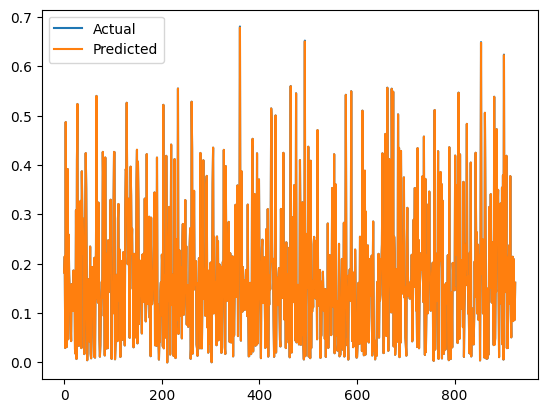

In [ ]:

# Evaluate the performance of the model on the training and validation sets
train_loss = model.evaluate(train_data.reshape((train_data.shape[0], train_data.shape[1], 1)), verbose=0)
val_loss = model.evaluate(val_data.reshape((val_data.shape[0], val_data.shape[1], 1)), verbose=0)
print(f'Training loss: {train_loss:.4f}')
print(f'Validation loss: {val_loss:.4f}')

# Visualize the predicted values alongside the actual training data
train_predictions = model.predict(train_data.reshape((train_data.shape[0], train_data.shape[1], 1)))
train_predictions = scaler.inverse_transform(train_predictions)
train_data = scaler.inverse_transform(train_data)
plt.plot(train_data, label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.legend()
plt.show()

In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the data
data = yf.download('AAPL', period='10y')

# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split the data into training and testing sets
training_data = scaled_data[:2000]
testing_data = scaled_data[2000:]

# Create the training data sequences
X_train = []
y_train = []
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Create the testing data sequences
X_test = []
for i in range(len(testing_data)-60, len(testing_data)):
    X_test.append(testing_data[i-60:i, 0])

X_test = np.array(X_test)

# Reshape the data for LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)

# Scale the predictions back to the original range
predictions = scaler.inverse_transform(predictions)

# Print the predicted prices for the next 10 days
print(predictions[-1:])


[*********************100%***********************]  1 of 1 completed
Epoch 1/50
61/61 [==============================] - 8s 56ms/step - loss: 0.0052
Epoch 2/50
61/61 [==============================] - 4s 58ms/step - loss: 2.5918e-04
Epoch 3/50
61/61 [==============================] - 5s 78ms/step - loss: 2.3792e-04
Epoch 4/50
61/61 [==============================] - 4s 72ms/step - loss: 2.3357e-04
Epoch 5/50
61/61 [==============================] - 4s 71ms/step - loss: 2.1009e-04
Epoch 6/50
61/61 [==============================] - 4s 69ms/step - loss: 2.1610e-04
Epoch 7/50
61/61 [==============================] - 4s 68ms/step - loss: 1.9023e-04
Epoch 8/50
61/61 [==============================] - 4s 67ms/step - loss: 2.2388e-04
Epoch 9/50
61/61 [==============================] - 4s 62ms/step - loss: 1.7491e-04
Epoch 10/50
61/61 [==============================] - 4s 70ms/step - loss: 1.6840e-04
Epoch 11/50
61/61 [==============================] - 4s 68ms/step - loss: 2.0948e-04
Epoch 12/

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the data
df = yf.download('AAPL', period='1y')
prices = df['Close'].values.reshape(-1,1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
prices = scaler.fit_transform(prices)

# Split the data into training and testing sets
train_size = int(len(prices)*0.8)
train_data = prices[:train_size,:]
testing_data = prices[train_size:,:]

# Create a function to create a sliding window dataset
def create_dataset(data, window_size=1):
    X, Y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        Y.append(data[i+window_size])
    return np.array(X), np.array(Y)

# Set the window size
window_size = 30

# Create the training and testing datasets
train_X, train_Y = create_dataset(train_data, window_size)
testing_X, testing_Y = create_dataset(testing_data, window_size)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train_X, train_Y, epochs=10, batch_size=1, verbose=2)



[*********************100%***********************]  1 of 1 completed
Epoch 1/100
171/171 - 3s - loss: 0.0269 - 3s/epoch - 17ms/step
Epoch 2/100
171/171 - 1s - loss: 0.0115 - 1s/epoch - 7ms/step
Epoch 3/100
171/171 - 1s - loss: 0.0093 - 1s/epoch - 8ms/step
Epoch 4/100
171/171 - 1s - loss: 0.0084 - 1s/epoch - 7ms/step
Epoch 5/100
171/171 - 1s - loss: 0.0076 - 1s/epoch - 7ms/step
Epoch 6/100
171/171 - 1s - loss: 0.0078 - 1s/epoch - 7ms/step
Epoch 7/100
171/171 - 1s - loss: 0.0067 - 1s/epoch - 7ms/step
Epoch 8/100
171/171 - 1s - loss: 0.0063 - 1s/epoch - 7ms/step
Epoch 9/100
171/171 - 1s - loss: 0.0063 - 1s/epoch - 7ms/step
Epoch 10/100
171/171 - 1s - loss: 0.0060 - 1s/epoch - 8ms/step
Epoch 11/100
171/171 - 1s - loss: 0.0061 - 1s/epoch - 8ms/step
Epoch 12/100
171/171 - 1s - loss: 0.0060 - 1s/epoch - 9ms/step
Epoch 13/100
171/171 - 1s - loss: 0.0053 - 1s/epoch - 7ms/step
Epoch 14/100
171/171 - 1s - loss: 0.0052 - 1s/epoch - 7ms/step
Epoch 15/100
171/171 - 1s - loss: 0.0054 - 1s/epoch - 7ms

ValueError: Found array with dim 3. None expected <= 2.

In [87]:

# Make predictions for the next 10 days
future_days = 10
future_X = testing_X[-1,:]
future_predictions = []
for i in range(future_days):
    future_pred = model.predict(future_X.reshape(1, window_size, 1))
    future_predictions.append(future_pred)
    future_X = np.append(future_X[1:], future_pred)


1/1 [==============================] - 0s 58ms/step


In [89]:
# Inverse transform the predictions
for i in range(len(future_predictions)):
    future_predictions[i] = scaler.inverse_transform(future_predictions[i]).flatten()


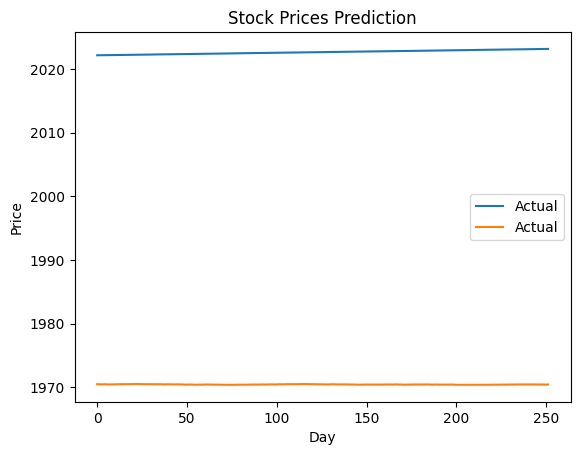

In [101]:
# Visualize the results
plt.plot(df['Close'].reset_index(), label='Actual')
# plt.plot(np.arange(len(df)-future_days, len(df)), future_predictions, label='Predicted')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Stock Prices Prediction')
plt.legend()
plt.show()